# Useful libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix





# Get the data

In [2]:
car_link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'

In [3]:
data = pd.read_csv(car_link, header=None)
data.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# EDA and cleaning

Names of the columns are [buying, maint, doors, persons, lug_boot, safety, class values] where `class values` is the target represents the car evalution or acceptability.  
Let's change the columns names for more readability.

In [4]:
names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "target"]

data.columns = names
data.head()

,buying,maint,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
# What are the data types for each column ?
data.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
target      object
dtype: object

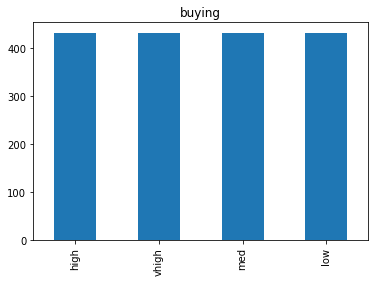

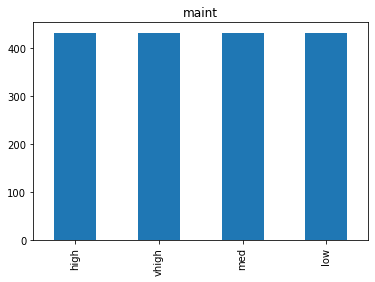

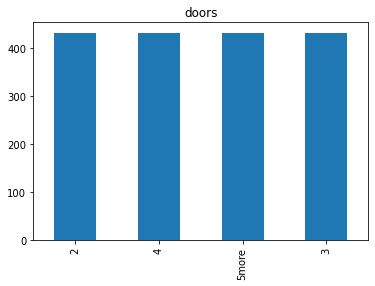

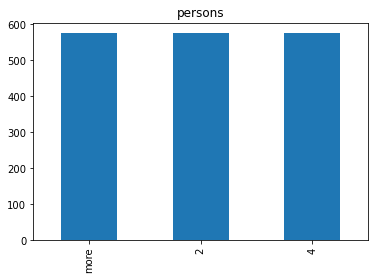

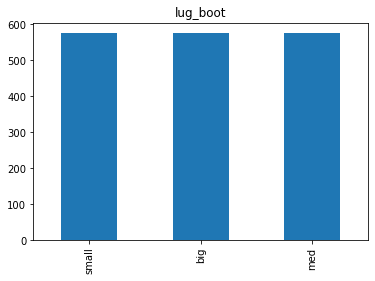

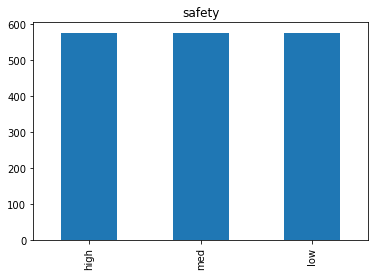

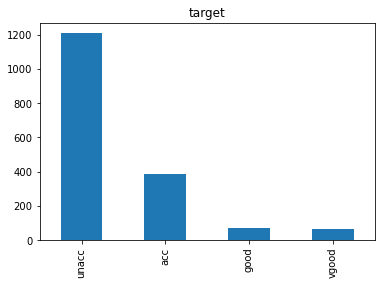

In [6]:
# And what are the values frequencies of values in each column ?

for column in data.columns:
    data[column].value_counts().plot(kind = 'bar')
    plt.title(column)
    plt.show()
    

While all classes in each each feature seem to be well balanced, our target value is quite unbalanced. This should be taken into consideration when splitting the data into training and testing by sampling with stratification based on the target.

In [7]:
# Any missing values?

pd.isna(data).any()

# Dataset looks complete

buying      False
maint       False
doors       False
persons     False
lug_boot    False
safety      False
target      False
dtype: bool

# Training and Test data sets

In [8]:
# Features and target separation
X = data.drop(columns= 'target')
y = data.target
X.head(), y.head()

(  buying  maint doors persons lug_boot safety
 0  vhigh  vhigh     2       2    small    low
 1  vhigh  vhigh     2       2    small    med
 2  vhigh  vhigh     2       2    small   high
 3  vhigh  vhigh     2       2      med    low
 4  vhigh  vhigh     2       2      med    med,
 0    unacc
 1    unacc
 2    unacc
 3    unacc
 4    unacc
 Name: target, dtype: object)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 0)

In [10]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1209, 6) (1209,) (519, 6) (519,)


# Preprocessing
All categorical features seem to have natural ordering. For example the `safety` feature has values of `low`, `med` and `high` which implies a rank from low to high.  
Ordinal encoding in this case seems to be more appropriate.

In [11]:
# Let's remind ourselves of the columns names and the order in which they appear
X_train.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')

In [12]:
# Mapping values in columns to corresponding ordering
# buying
print(X_train.buying.unique())
buying = ['low', 'med', 'high', 'vhigh']

['med' 'vhigh' 'high' 'low']


In [13]:
# maint
print(X_train.maint.unique())
maint = ['low', 'med', 'high', 'vhigh']

['med' 'low' 'high' 'vhigh']


In [14]:
# doors
print(X_train.doors.unique())
doors = ['2', '3', '4', '5more']

['2' '5more' '3' '4']


In [15]:
# persons
print(X_train.persons.unique())
persons = ['2', '4', 'more']

['more' '2' '4']


In [16]:
# lug_boot
print(X_train.lug_boot.unique())
lug_b = ['small', 'med', 'big']

['small' 'big' 'med']


In [17]:
# safety
print(X_train.safety.unique())
safety = ['low', 'med', 'high']

['med' 'low' 'high']


In [18]:
# Instatianting ordinal enconder
oe = OrdinalEncoder(categories=[buying, maint, doors, persons, lug_b, safety])

In [19]:
X_train_encoded = oe.fit_transform(X_train)
X_test_encoded = oe.transform(X_test)

# Decision Tree

In [20]:
tree_clf = DecisionTreeClassifier(random_state=0)

## Pipeline

In [21]:
pipe = make_pipeline(oe, tree_clf)
pipe

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(categories=[['low', 'med', 'high', 'vhigh'],
                                            ['low', 'med', 'high', 'vhigh'],
                                            ['2', '3', '4', '5more'],
                                            ['2', '4', 'more'],
                                            ['small', 'med', 'big'],
                                            ['low', 'med', 'high']])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=0))])

## Fitting

In [23]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(categories=[['low', 'med', 'high', 'vhigh'],
                                            ['low', 'med', 'high', 'vhigh'],
                                            ['2', '3', '4', '5more'],
                                            ['2', '4', 'more'],
                                            ['small', 'med', 'big'],
                                            ['low', 'med', 'high']])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=0))])

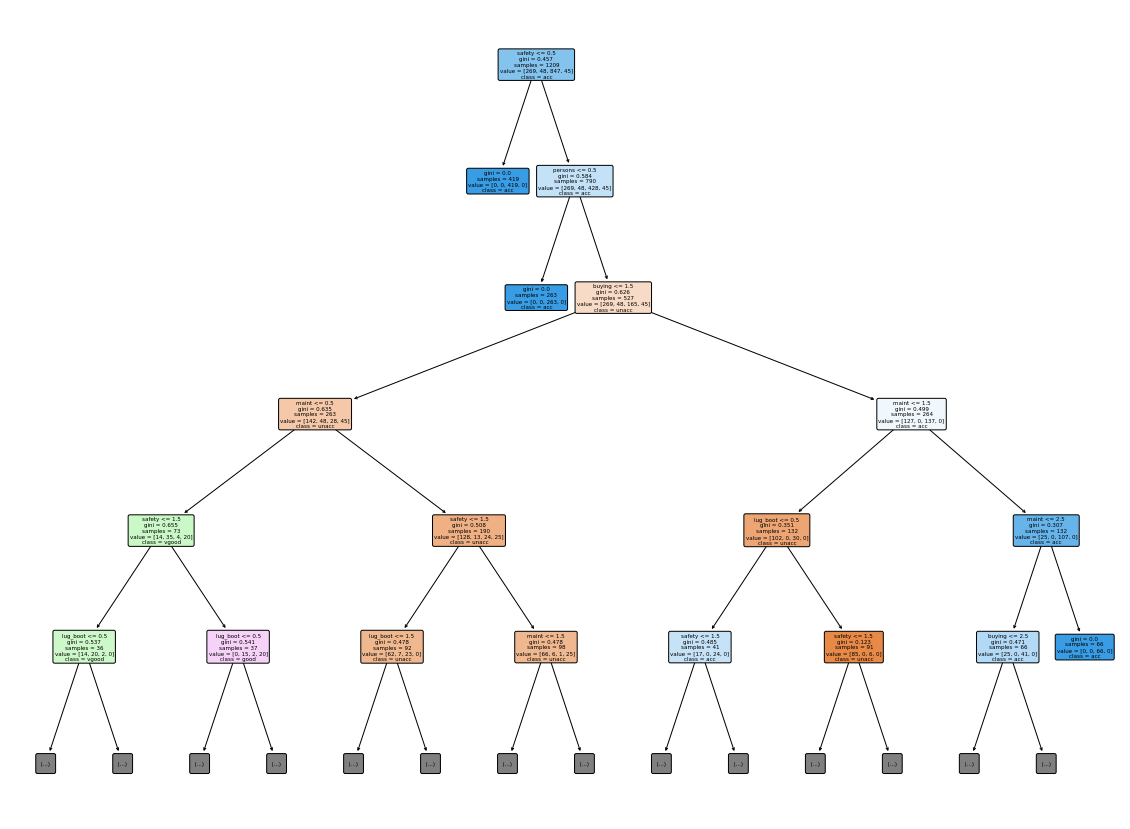

In [24]:
plt.figure(figsize=(20, 15))
plot_tree(pipe['decisiontreeclassifier'],
          filled=True,
          rounded=True,
          class_names=y_train.unique(),
         feature_names=X_train.columns, 
         max_depth=5)

plt.show()

## Performance

In [43]:
# Cross validation
scores = cross_val_score(pipe, X_train, y_train)
print('mean score: {:.2f} | standard deviation: {:.2f}'.format(scores.mean(), scores.std()))
np.round(scores, 2)

mean score: 0.97 | standard deviation: 0.01


array([0.98, 0.98, 0.98, 0.98, 0.95])

In [44]:
# Score on test
round(pipe.score(X_test, y_test), 2)

0.97

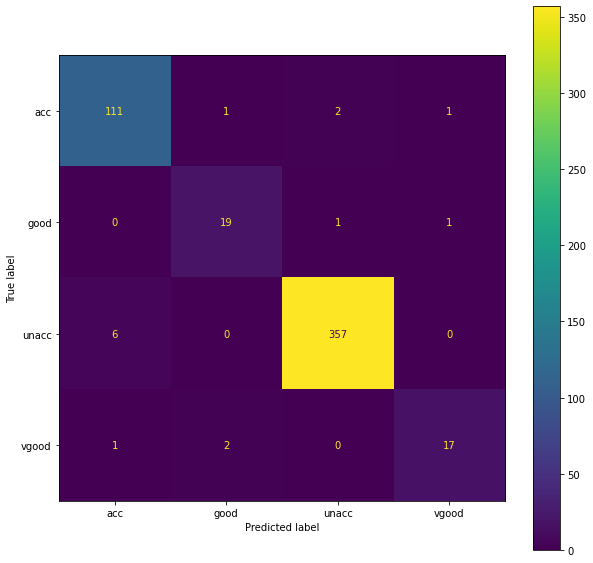

In [26]:
# confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(pipe, X_test, y_test, ax = ax)

## Hyperparamater Tuning

In [27]:
pipe['decisiontreeclassifier'].get_depth()

13

In [28]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'ordinalencoder', 'decisiontreeclassifier', 'ordinalencoder__categories', 'ordinalencoder__dtype', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_impurity_split', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__presort', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter'])

In [29]:
params = {'decisiontreeclassifier__criterion': ['gini', 'entropy'], 
          'decisiontreeclassifier__max_depth': range(5, 14)}
gscv = GridSearchCV(pipe, param_grid=params).fit(X_train, y_train)

In [30]:

pd.DataFrame(gscv.cv_results_).sort_values(by = "rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decisiontreeclassifier__criterion,param_decisiontreeclassifier__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,0.008195,0.000744,0.002602,8.016240e-04,entropy,13,{'decisiontreeclassifier__criterion': 'entropy...,0.979339,0.987603,0.987603,0.979339,0.970954,0.980968,0.006223,1
15,0.007712,0.001797,0.002600,8.001928e-04,entropy,11,{'decisiontreeclassifier__criterion': 'entropy...,0.979339,0.987603,0.987603,0.979339,0.970954,0.980968,0.006223,1
16,0.007296,0.001164,0.002331,6.628812e-04,entropy,12,{'decisiontreeclassifier__criterion': 'entropy...,0.979339,0.987603,0.987603,0.979339,0.970954,0.980968,0.006223,1
14,0.007967,0.001098,0.002601,4.898072e-04,entropy,10,{'decisiontreeclassifier__criterion': 'entropy...,0.975207,0.987603,0.983471,0.987603,0.966805,0.980138,0.008058,4
7,0.006629,0.001178,0.002938,1.880365e-03,gini,12,"{'decisiontreeclassifier__criterion': 'gini', ...",0.979339,0.983471,0.983471,0.979339,0.954357,0.975995,0.010976,5
6,0.006911,0.000931,0.002015,6.175082e-04,gini,11,"{'decisiontreeclassifier__criterion': 'gini', ...",0.979339,0.983471,0.983471,0.979339,0.946058,0.974336,0.014259,6
8,0.008292,0.001534,0.002602,4.919496e-04,gini,13,"{'decisiontreeclassifier__criterion': 'gini', ...",0.979339,0.983471,0.983471,0.979339,0.946058,0.974336,0.014259,6
13,0.009195,0.001170,0.003197,1.164307e-03,entropy,9,{'decisiontreeclassifier__criterion': 'entropy...,0.971074,0.979339,0.975207,0.971074,0.950207,0.969380,0.010064,8
5,0.007739,0.001330,0.002209,3.892488e-04,gini,10,"{'decisiontreeclassifier__criterion': 'gini', ...",0.979339,0.971074,0.975207,0.979339,0.941909,0.969373,0.014070,9
12,0.007991,0.001419,0.003247,1.243871e-03,entropy,8,{'decisiontreeclassifier__criterion': 'entropy...,0.958678,0.979339,0.958678,0.971074,0.966805,0.966915,0.007841,10


In [45]:
# Test with model ranked 4
new_pipe_tree = make_pipeline(oe, DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=10))
new_pipe_tree.fit(X_train, y_train).score(X_test, y_test)

0.9672447013487476

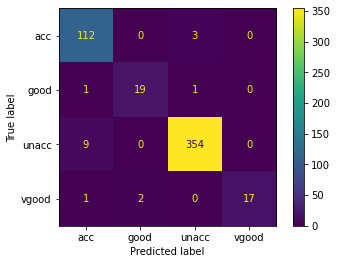

In [46]:
plot_confusion_matrix(new_pipe_tree, X_test, y_test)

# Random Forest

In [33]:
forest = RandomForestClassifier()

## Pipeline

In [34]:
pipe2 = make_pipeline(oe, forest)

## Fitting

In [36]:
pipe2.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(categories=[['low', 'med', 'high', 'vhigh'],
                                            ['low', 'med', 'high', 'vhigh'],
                                            ['2', '3', '4', '5more'],
                                            ['2', '4', 'more'],
                                            ['small', 'med', 'big'],
                                            ['low', 'med', 'high']])),
                ('randomforestclassifier', RandomForestClassifier())])

## Performance

In [39]:
scores = cross_val_score(pipe2, X_train, y_train)
print('mean score: {:.2f} | standard deviation: {:.2f}'.format(scores.mean(), scores.std()))
scores

mean score: 0.98 | standard deviation: 0.01


array([0.97933884, 0.98347107, 0.98347107, 0.96694215, 0.96680498])